In [1]:
from files.utils.constants import *
from files.utils.utility_functions import *
from files.utils.dataset_creator import *
from files.pif.pif import *

In [2]:
params = {
    'npoints': 500,
    'of': 0.5,
    'nmodels': 5,
    'mss': 20,
}

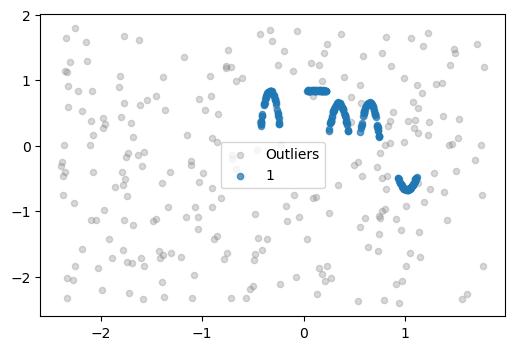

In [3]:
# ds, gt = create_dataset_line(params["npoints"], m_s=np.random.uniform(-3, 3, size=(params["nmodels"])), centers=np.random.uniform(-30, 30, size=(params["nmodels"], 2)), outliers_fraction=params["of"])
ds, gt = create_dataset_parabola(params["npoints"], a_s=np.random.uniform(-3, 3, size=(params["nmodels"])), centers=np.random.uniform(-30, 30, size=(params["nmodels"], 2)), outliers_fraction=params["of"])

ds = normalize_points(ds)
gt[gt > 1] = 1
plot_clusters(gt, ds)

In [38]:
ds, gt = load_dataset_by_name(name="circle3", file_path=joinpath("..", "..", "datasets", "2d", "circles", "with_outliers"))

In [39]:
pars = {
    "AE_structure":{
        "n_inputs": 2,
        "n_outputs": 2,
        "n_hidden": 0,
        "activation": lambda x: x
    }
}

In [40]:
ran = PreferenceIsolationForest(data=ds, model_name=AE)
scores = ran.anomaly_detection(num_models=200, mss=10, epochs=100, params=pars)
scores_old = scores.copy()

Anomaly Detection
--------------------------------------------------
Building RanSac models
Iteration 200/200: [==============================] (100%) ETA: 0:00:00.411386
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Building Voronoi Forest
--------------------------------------------------
Done


In [41]:
ran = PreferenceIsolationForest(data=ds, model_name=AE)
scores = ran.anomaly_detection(num_models=20, mss=10, epochs=100, params=pars)
scores_old = scores.copy()

Anomaly Detection
--------------------------------------------------
Building RanSac models
Iteration 20/20: [==============================] (100%) ETA: 0:00:00.045550
--------------------------------------------------
Building preference matrix
--------------------------------------------------
Building Voronoi Forest
--------------------------------------------------
Done


In [42]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# print(np.sum(scores))
# scores = softmax(scores)
# print(np.sum(scores))

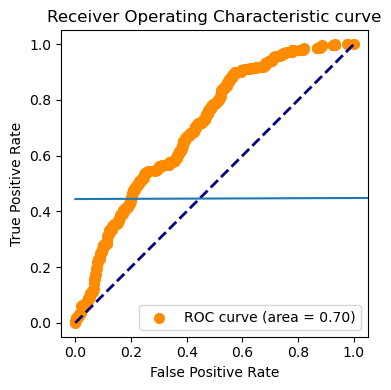

In [43]:
from sklearn.metrics import roc_curve, auc
scores_norm = softmax(scores_old)
fpr, tpr, thr = roc_curve(1-gt, scores)
roc_auc: float = auc(fpr, tpr)

lw = 2
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, aspect='equal')

ax.scatter(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.axis('equal')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.tight_layout()

stop = 1
plt.plot([i for i in range(len(thr)-stop)], np.sort(thr[stop:]))

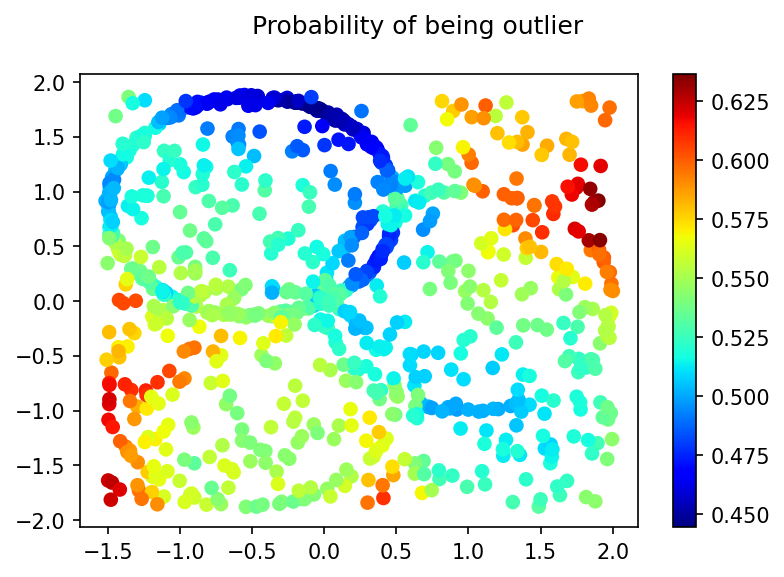

In [44]:
fig = plt.figure(dpi=150)
fig.suptitle("Probability of being outlier")
fig.tight_layout()
plt.scatter(ds[:,0], ds[:,1], c=scores, cmap="jet")
plt.colorbar()

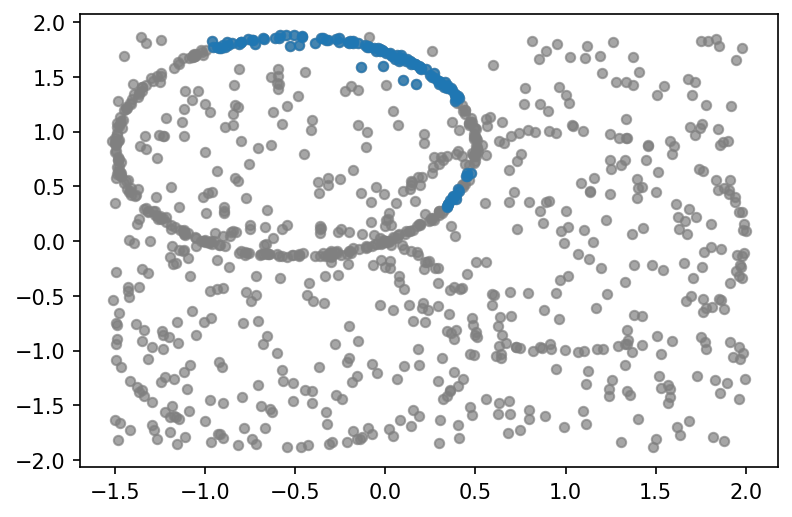

In [45]:
inliers = ds[scores <= thr[-30]]
plot(ds, c='gray', new_fig=True)
plot(inliers)